In [958]:
import pandas as pd

In [959]:
df = pd.read_csv("data_preprocessed.csv")
df.head()

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,is_holiday,region_size_numeric
0,422206773,58.0,0,No,NaN,NaN,NaN,NaN,NaN,NaN,...,142052.0,30,W,NaN,1,NaN,NaN,1,0,0
1,348648289,44.0,1,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,7004.0,36,W,NaN,2,RUS,NaN,2,0,4
2,345496995,23.0,0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,80760.0,52,W,NaN,6,NaN,NaN,4,0,1
3,182783192,34.0,1,town,0.0,0.0,0.0,0.0,0.0,0.0,...,158672.0,22,NaN,NaN,8,NaN,NaN,4,0,1
4,138498254,30.0,1,No,NaN,NaN,NaN,NaN,NaN,NaN,...,14462.0,51,W,NaN,7,NaN,NaN,0,0,0


In [960]:
df.shape

(16379, 31)

In [961]:
df = df.dropna(subset=["state_talk_time_sec"])

In [962]:
df.shape

(16256, 31)

In [963]:
df["wo_hit_status_result_desc"].head()

0      Дозвон, Отказ
1      Дозвон, Отказ
2    Дозвон, Успешно
3    Дозвон, Успешно
4      Дозвон, Отказ
Name: wo_hit_status_result_desc, dtype: object

In [964]:
df["approval_flag"] = df["wo_hit_status_result_desc"].replace({"Дозвон, Отказ": 0, "Дозвон, Успешно": 1})
df["approval_flag"].head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21696\310123056.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["approval_flag"] = df["wo_hit_status_result_desc"].replace({"Дозвон, Отказ": 0, "Дозвон, Успешно": 1})


0    0
1    0
2    1
3    1
4    0
Name: approval_flag, dtype: int64

In [965]:
df["bundle_nm"].isna().sum()

12209

In [966]:
df["bundle_nm"].value_counts()

bundle_nm
Pro        3800
Premium     246
XXX           1
Name: count, dtype: int64

In [967]:
df["bundle_nm"] = df["bundle_nm"].replace("XXX", 0)
df["bundle_nm"] = df["bundle_nm"].fillna(0)
df["bundle_nm"] = df["bundle_nm"].replace("Pro", 1)
df["bundle_nm"] = df["bundle_nm"].replace("Premium", 1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21696\3617172054.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["bundle_nm"] = df["bundle_nm"].replace("Premium", 1)


In [968]:
df["bundle_nm"].value_counts()

bundle_nm
0    12210
1     4046
Name: count, dtype: int64

In [969]:
df.groupby("approval_flag")["age"].mean()

approval_flag
0    37.914701
1    37.629812
Name: age, dtype: float64

In [970]:
df.groupby("approval_flag")["gender_cd"].mean()

approval_flag
0    0.526423
1    0.576505
Name: gender_cd, dtype: float64

In [971]:
df.groupby("approval_flag")["is_holiday"].mean()

approval_flag
0    0.098032
1    0.120928
Name: is_holiday, dtype: float64

In [972]:
df.shape

(16256, 32)

In [973]:
df.groupby("approval_flag")["bundle_nm"].mean()

approval_flag
0    0.250668
1    0.236426
Name: bundle_nm, dtype: float64

<Axes: xlabel='state_talk_time_sec', ylabel='Count'>

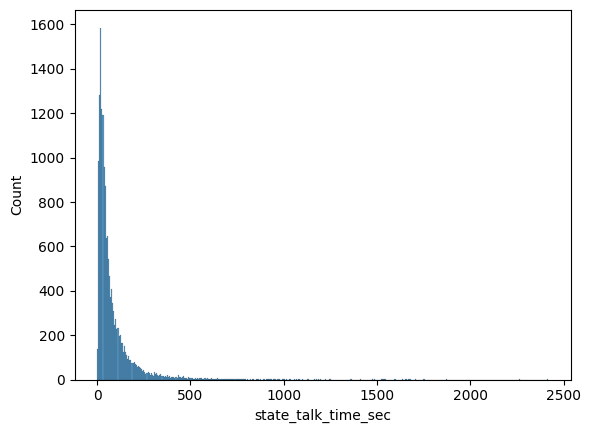

In [974]:
import seaborn as sns

sns.histplot(df["state_talk_time_sec"])

<Axes: ylabel='state_talk_time_sec'>

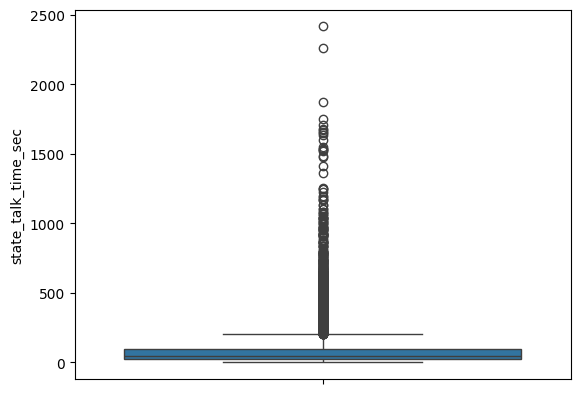

In [975]:
sns.boxplot(df["state_talk_time_sec"])

In [976]:
IQR = df["state_talk_time_sec"].quantile(0.75) - df["state_talk_time_sec"].quantile(0.25)
high = df["state_talk_time_sec"].quantile(0.75) + IQR * 1.5
high

206.5

In [977]:
df.groupby("approval_flag")["state_talk_time_sec"].median()

approval_flag
0     39.0
1    175.0
Name: state_talk_time_sec, dtype: float64

In [978]:
df["approval_flag"].value_counts()

approval_flag
0    14230
1     2026
Name: count, dtype: int64

In [979]:
df[df["state_talk_time_sec"] > high]["approval_flag"].value_counts()

approval_flag
1    846
0    561
Name: count, dtype: int64

In [980]:
df[df["state_talk_time_sec"] > high]["state_talk_time_sec"].count()

1407

In [981]:
df[df["state_talk_time_sec"] < high]["state_talk_time_sec"].count()

14849

Смотрим успешность подвыборок

In [982]:
outliers = df[df["state_talk_time_sec"] > high]

In [983]:
success_rate_outliers = outliers["approval_flag"].mean()  # Средняя успешность выбросов
success_rate_normal = df[df["state_talk_time_sec"] <= high]["approval_flag"].mean()
success_rate_outliers, success_rate_normal

(0.6012793176972282, 0.07946663074954542)

In [984]:
from scipy.stats import ttest_ind

normal_calls = df[df["state_talk_time_sec"] <= high]["approval_flag"]
outlier_calls = outliers["approval_flag"]

t_stat, p_value = ttest_ind(normal_calls, outlier_calls)

p_value < 0.0000000001, p_value 

(True, 0.0)

In [985]:
df["is_outlier"] = df["state_talk_time_sec"] > high

In [986]:
df.groupby("approval_flag")["is_outlier"].mean()

approval_flag
0    0.039424
1    0.417572
Name: is_outlier, dtype: float64

Чистим выбросы

In [987]:
df = df[df["state_talk_time_sec"] < high]

In [988]:
df.groupby("approval_flag")["state_talk_time_sec"].mean()

approval_flag
0     51.207989
1    117.594068
Name: state_talk_time_sec, dtype: float64

In [989]:
df["approval_flag"].value_counts()

approval_flag
0    13669
1     1180
Name: count, dtype: int64

In [990]:
# df = df.dropna(subset=["emp_gender_cd"])

In [991]:
# df["emp_gender_cd"].value_counts()

In [992]:
# df["emp_gender_cd"] = df["emp_gender_cd"].fillna("W")

In [993]:
# df["emp_gender_cd"] = df["emp_gender_cd"].replace({"W":0, "M":1})

In [994]:
# df.groupby("approval_flag")["emp_gender_cd"].mean()